In [1]:
import urllib3
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import requests

C:\Users\SRIDIP\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\SRIDIP\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\SRIDIP\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
C:\Users\SRIDIP\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858:

             Language  Tag_Count
0          javascript    1753591
1                java    1508415
2                  c#    1280948
3                 php    1258509
4             android    1168868
5              python    1102466
6              jquery     942389
7                html     800985
8                 c++     603062
9                 ios     589402
10                css     571429
11              mysql     548323
12                sql     476587
13            asp.net     342269
14      ruby-on-rails     302423
15                  c     295306
16        objective-c     286673
17             arrays     286450
18               .net     279070
19                  r     273548
20            node.js     260291
21          angularjs     256977
22               json     253882
23         sql-server     251989
24              swift     220166
25             iphone     219791
26               ruby     201960
27              regex     201955
28               ajax     195986
29        

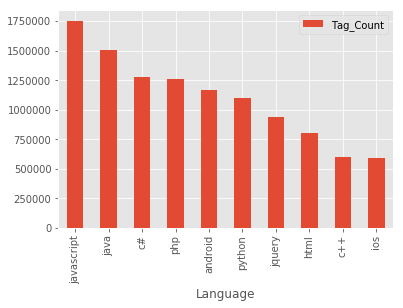

In [2]:
df = {'Language':[],'Tag_Count':[]}



def extract_tagged(url):
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    soup = bs(response.data)
    #getting the data from the class:post-tag -> Languages 
    for tag in soup.find_all('a',attrs={'class':'post-tag'}):
        df['Language'].append(tag.text)
    #getting the data from the class:item-multiplier-count -> Tag_Count     
    for count in soup.find_all('span',attrs={'class':'item-multiplier-count'}):
        df['Tag_Count'].append(count.text)
    
for i in range(1,3):
    extract_tagged('http://stackoverflow.com/tags?page='+str(i)+'&tab=popular')    
df['Tag_Count']=[int(i) for i in df['Tag_Count']]

df2= pd.DataFrame(df)
print(df2)


style.use('ggplot')

df2.sort_values(by=['Tag_Count'],ascending=False).head(10).set_index('Language').plot(kind='bar')
plt.show()
